# Optimizing Neural Networks for Regression: Hyperparameter Tuning and Model Training

## Introduction

This project focuses on leveraging neural networks to solve a regression problem using Keras. The primary objective is to train a model that minimizes prediction error while experimenting with various hyperparameters and model architectures to optimize performance.

Key aspects include:

- **Data Preprocessing**: Applying sensible preprocessing steps to prepare data for neural network training.
- **Hyperparameter Tuning**: Experimenting with important parameters like the number of hidden layers, neurons per layer, learning rate, activation functions, optimizers, and dropout rates. The goal is to identify the best combination that minimizes the Mean Squared Error (MSE), a metric crucial for understanding prediction error in real-world terms.
- **Model Evaluation**: Using cross-validation to assess model performance across different configurations and ensure robust evaluation.

This project highlights the importance of hyperparameter optimization in achieving high-quality neural networks and demonstrates practical techniques for fine-tuning models to solve regression problems effectively.

## Data Import

In [1]:
import pandas as pd

df_train_X = pd.read_csv('../data/X_train_optimizing_neural_networks_for_regression_hyperparameter_tuning_and_model_training.csv')
df_test_X = pd.read_csv('../data/X_test_optimizing_neural_networks_for_regression_hyperparameter_tuning_and_model_training.csv')
df_train_y = pd.read_csv('../data/y_train_optimizing_neural_networks_for_regression_hyperparameter_tuning_and_model_training.csv')
df_test_y = pd.read_csv('../data/y_test_optimizing_neural_networks_for_regression_hyperparameter_tuning_and_model_training.csv')

In [3]:
df_train_X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
df_train_y.head()

,Unnamed: 0,0
0,0,15.2
1,1,42.3
2,2,50.0
3,3,21.1
4,4,17.7


In [7]:
df_train_X = df_train_X.drop(df_train_X.columns[0], axis=1)
df_test_X = df_test_X.drop(df_test_X.columns[0], axis=1)
df_train_y = df_train_y.drop(df_train_y.columns[0], axis=1)
df_test_y = df_test_y.drop(df_test_y.columns[0], axis=1)

In [9]:
df_train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
df_train_y.head()

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [ ]:
X_train = df_train_X.values
print(X_train.shape)
X_test = df_test_X.values
print(X_test.shape)
y_train = df_train_y.values.reshape(-1)
print(y_train.shape)
y_test = df_test_y.values.reshape(-1)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Impact of Changing Model Architecture

### Baseline model

In [ ]:
# Preprocess the Data:

# Before training the model, it's crucial to standardize the features.
# Standardization involves subtracting the mean and dividing by the standard deviation for each feature in the training data.
# This can also be applied to the test data using the parameters (mean and standard deviation) from the training data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the Baseline Model:

# The baseline model will have a single fully-connected hidden layer with the same number of neurons as input features (13 in this case),
# and no activation function for the output layer since it's a regression problem.

from keras.models import Sequential
from keras.layers import Dense

def baseline_model(input_dim):
    # Define the model
    model = Sequential()
    model.add(Dense(13, input_dim=input_dim, activation='relu'))  # Hidden layer with 13 neurons
    model.add(Dense(1))  # Output layer without activation function

    return model

In [ ]:
# Compile the Model:

# Let's compile the model using the ADAM optimizer and mean squared error as the loss function,
# which is appropriate for regression problems.

model = baseline_model(input_dim=X_train_scaled.shape[1])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the Model:

# Let's train the model on the standardized training data, including both training and validation performance monitoring.

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

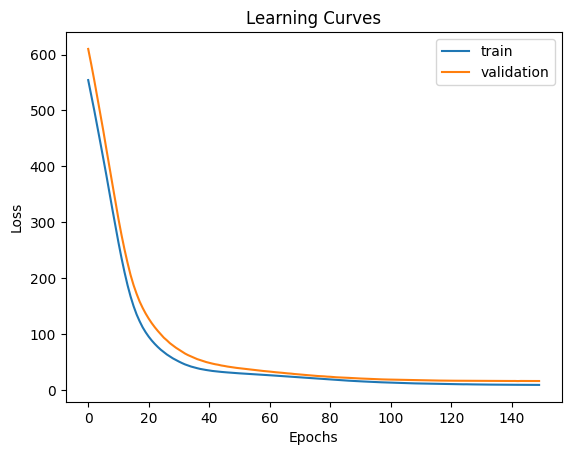

In [ ]:
# Plot Learning Curves:

# Plotting learning curves involves plotting the training and validation loss over epochs to understand how well the model is learning.

import matplotlib.pyplot as plt

# Plotting learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Learning Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
# Evaluate the Model:

# Finally, let's evaluate the model's performance on the test set, which has been scaled as well.

test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test loss (MSE): {test_loss}')

Test loss (MSE): 23.082576751708984


### Deeper Network

In [ ]:
# Define the Deeper Model:

# For the deeper network, we'll create a model with two hidden layers.
# The first layer will have 16 neurons, and the second layer will have 8 neurons.
# This structure is chosen to gradually reduce the dimensionality, potentially capturing more complex relationships in the data.

def deeper_model(input_dim):
    # Define the model
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))  # First hidden layer with 16 neurons
    model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 neurons
    model.add(Dense(1))  # Output layer without activation function for regression

    return model

In [ ]:
# Compile the Model:

# Let's compile this deeper model using the same optimizer (ADAM) and loss function (mean squared error) as the baseline model.

deeper_model = deeper_model(input_dim=X_train_scaled.shape[1])
deeper_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the Model:

# Let's train the deeper model on the standardized training data.

history_deeper = deeper_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

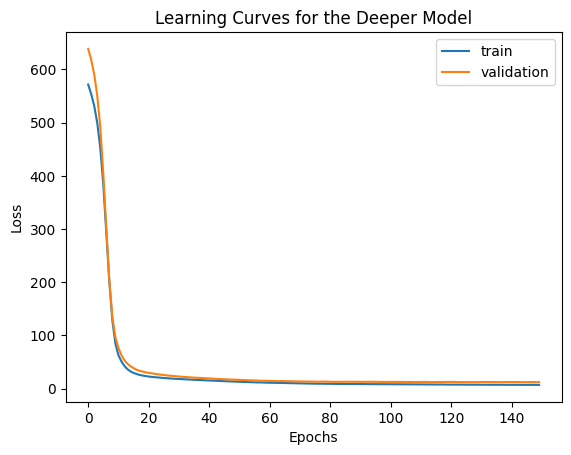

In [ ]:
# Plot Learning Curves:

# Let's plot the learning curves for the deeper model to visualize the training and validation loss over epochs.

# Plotting learning curves for the deeper model
plt.plot(history_deeper.history['loss'], label='train')
plt.plot(history_deeper.history['val_loss'], label='validation')
plt.title('Learning Curves for the Deeper Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
# Evaluate the Model:

# This deeper model introduces additional complexity and has the potential to capture more nuanced patterns in the data
# compared to the single-layer baseline model.
# Let's evaluate the deeper model's performance on the test set to compare it with the baseline model.

test_loss_deeper = deeper_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test loss (MSE) for the deeper model: {test_loss_deeper}')

Test loss (MSE) for the deeper model: 22.59113121032715


### Wider Network

In [ ]:
# Define the Wider Model:

# For the wider model, we'll increase the number of neurons in the two hidden layers to 32 and 16, respectively.
# This aims to provide the model with more capacity to learn complex patterns in the data.

def wider_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))  # First hidden layer with 32 neurons
    model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
    model.add(Dense(1))  # Output layer for regression, without an activation function

    return model

In [ ]:
# Compile the Model:

# Let's compile this wider model using ADAM as the optimizer and mean squared error as the loss function.
# This setup is consistent with the other models for a fair comparison.

model = wider_model(input_dim=X_train_scaled.shape[1])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the Model:

# Let's train the wider model on the standardized training data.
# Here, you can use the same training approach as with the previous models, including the number of epochs and batch size.

history_wider = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
33/33 [==============================] - 1s 8ms/step - loss: 502.8779 - val_loss: 523.8501
Epoch 2/150
33/33 [==============================] - 0s 4ms/step - loss: 427.5709 - val_loss: 427.6729
Epoch 3/150
33/33 [==============================] - 0s 3ms/step - loss: 326.0830 - val_loss: 297.7415
Epoch 4/150
33/33 [==============================] - 0s 4ms/step - loss: 205.4238 - val_loss: 171.2523
Epoch 5/150
33/33 [==============================] - 0s 4ms/step - loss: 115.1757 - val_loss: 96.3821
Epoch 6/150
33/33 [==============================] - 0s 3ms/step - loss: 73.7584 - val_loss: 68.8101
Epoch 7/150
33/33 [==============================] - 0s 4ms/step - loss: 54.5112 - val_loss: 50.9162
Epoch 8/150
33/33 [==============================] - 0s 4ms/step - loss: 41.5942 - val_loss: 38.6311
Epoch 9/150
33/33 [==============================] - 0s 3ms/step - loss: 33.2750 - val_loss: 32.1930
Epoch 10/150
33/33 [==============================] - 0s 4ms/step - loss: 28.7264 

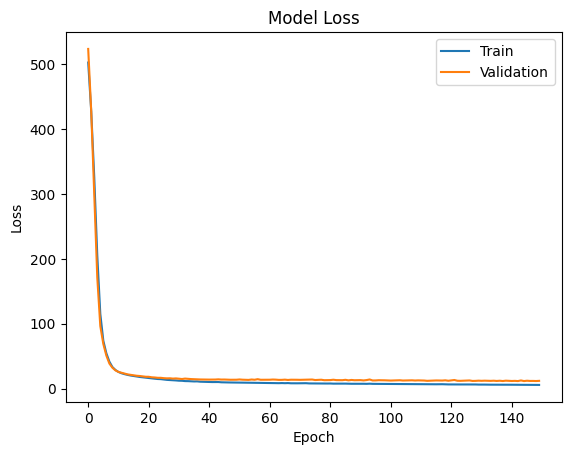

In [ ]:
# Plot Learning Curves:

# Let's plot learning curves for the wider model to visualize training and validation loss over epochs.
# This helps in understanding the learning process and identifying overfitting or underfitting.

import matplotlib.pyplot as plt

plt.plot(history_wider.history['loss'], label='Train Loss')
plt.plot(history_wider.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# This wider model, with more neurons in its layers, is designed to explore whether a larger capacity model
# can better capture the complexity of the dataset, potentially improving prediction accuracy.

# Evaluate the Model:

# Finally, let's evaluate the model's performance on the test set to understand
# how the increased width (neuron count) impacts its predictive accuracy.

test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MSE: {test_loss}')

Test MSE: 21.06119728088379


In [ ]:
# The wider model performed the best among the three models,
# achieving the lowest test loss (Mean Squared Error, MSE) of 21.06119728088379.
# This indicates that it was the most accurate in predicting the numerical values,
# suggesting that the increased number of neurons in its layers provided it with the capacity
# to capture more complex patterns and relationships in the data compared to the simpler single-layer baseline model
# and the deeper model with more but narrower layers.

# The wider model's superior performance underscores the importance of network width in enhancing model capacity
# and its ability to generalize from the training data to unseen data, leading to more accurate predictions.

## Hyperparameter Tuning

### Model 1

In [ ]:
# Define the Model:

# First, let's define the model architecture as specified.

def create_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),  # First dense layer
        Dense(64, activation='relu'),  # Second dense layer
        Dense(1)  # Output layer
    ])
    return model

# The output layer does not use an activation function since it is a regression problem.

In [ ]:
# Compile the Model:

# Let's compile the model inside the function that will be used for cross-validation to ensure it's compiled fresh each time.

def compile_and_train(model, X_train, y_train, epochs=100, validation_split=0.2):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_split=validation_split, verbose=0)
    return history

In [ ]:
# Cross-Validation:

# For cross-validation, Keras does not have built-in support for cross-validation,
# so we'll use KFold from sklearn.model_selection and manually loop over folds.

from sklearn.model_selection import KFold
import numpy as np

n_splits = 3
kf = KFold(n_splits=n_splits)

cv_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    # Split data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the model
    model = create_model(input_dim=X_train_scaled.shape[1])
    history = compile_and_train(model, X_train_fold, y_train_fold, epochs=100)

    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])  # Assuming index 1 is MAE

# Report Cross-Validation MAE and Standard Deviation
mean_mae = np.mean(cv_scores)
std_mae = np.std(cv_scores)
print(f"Cross-Validated MAE: {mean_mae:.4f} ± {std_mae:.4f}")

Cross-Validated MAE: 2.5165 ± 0.2745


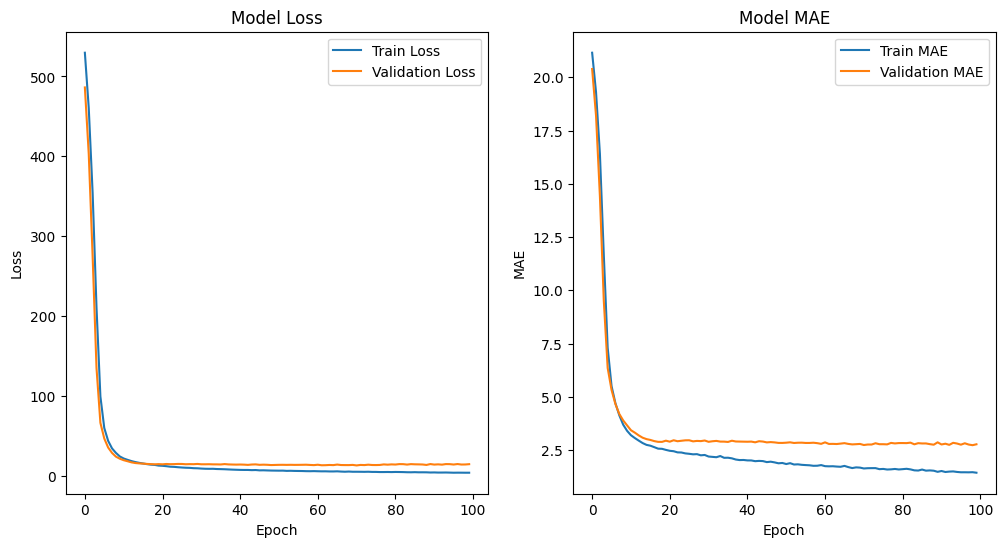

In [ ]:
# Plot Learning Curves:

# The plotting should ideally be done for each fold to understand the model's performance trend across different segments of the data.
# However, due to the complexity and repetitiveness,
# it might be more practical to plot the learning curves for one fold or summarize across folds if the data allows.

# Plotting learning curves for the last fold
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Model 2

In [ ]:
# For Model 2, which has a first dense layer with 128 neurons and a second dense layer with 64 neurons,
# all using ReLU activation, we'll follow a similar approach as for Model 1,
# but adjust the model's architecture according to the new specifications.
# This model aims to explore the impact of a larger number of neurons in the first layer on the model's performance.

# Define Model 2:

def create_model_2(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),  # First dense layer with 128 neurons
        Dense(64, activation='relu'),  # Second dense layer with 64 neurons
        Dense(1)  # Output layer
    ])
    return model

In [ ]:
# Compile the Model:

# The model compilation step, including the optimizer, loss function, and metrics, remains the same.

def compile_and_train(model, X_train, y_train, epochs=100, validation_split=0.2):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_split=validation_split, verbose=0)
    return history

In [ ]:
# Cross-Validation for Model 2:

# We use KFold from Scikit-Learn for cross-validation, similar to the approach for Model 1, but apply it to Model 2.

n_splits = 3
kf = KFold(n_splits=n_splits)

cv_scores_2 = []

for train_index, val_index in kf.split(X_train_scaled):
    # Split data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train Model 2
    model = create_model_2(input_dim=X_train_scaled.shape[1])
    history = compile_and_train(model, X_train_fold, y_train_fold, epochs=100)

    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores_2.append(scores[1])  # Assuming index 1 is MAE

# Calculate and report cross-validated MAE and its standard deviation for Model 2
mean_mae_2 = np.mean(cv_scores_2)
std_mae_2 = np.std(cv_scores_2)
print(f"Model 2 Cross-Validated MAE: {mean_mae_2:.4f} ± {std_mae_2:.4f}")

Model 2 Cross-Validated MAE: 2.4611 ± 0.1586


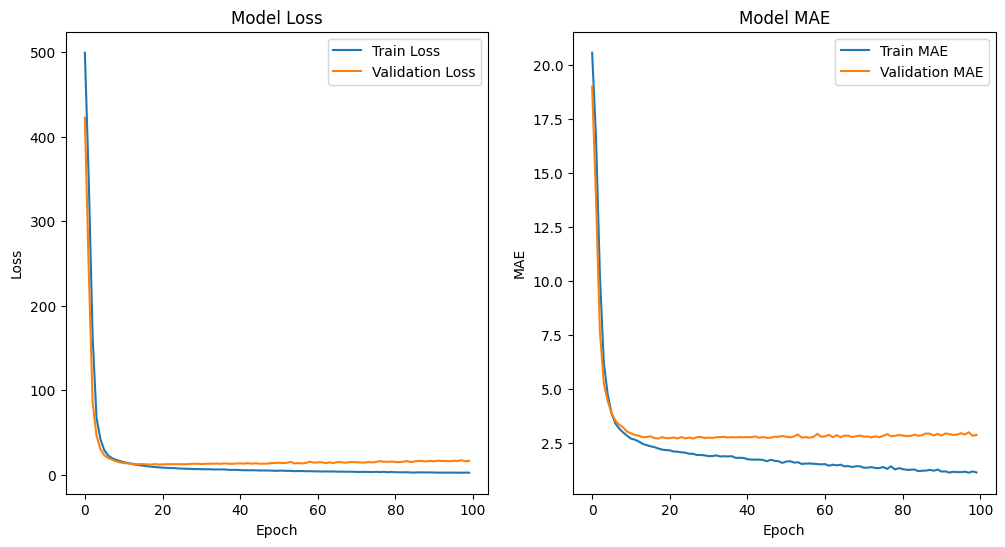

In [ ]:
# Plot Learning Curves for Model 2:

# Plotting for Model 2 can be done similarly to Model 1, focusing on loss and MAE for both training and validation.
# This visual representation helps in understanding the model's learning behavior over epochs.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Model 3

In [ ]:
# For Model 3, which modifies Model 2 by using tanh activation functions instead of relu for the two dense layers,
# we'll follow the structure outlined for Model 2 but adjust the activation functions accordingly.
# This change aims to explore the impact of different activation functions on the model's performance.

# Define Model 3:

# We'll define Model 3 with the same architecture as Model 2, but replace relu activation functions with tanh.

def create_model_3(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='tanh'),  # First dense layer with 128 neurons, tanh activation
        Dense(64, activation='tanh'),  # Second dense layer with 64 neurons, tanh activation
        Dense(1)  # Output layer
    ])
    return model

In [ ]:
# Compile the Model:

# The model compilation step, including the optimizer, loss function, and metrics, remains the same.

def compile_and_train(model, X_train, y_train, epochs=100, validation_split=0.2):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_split=validation_split, verbose=0)
    return history

In [ ]:
# Cross-Validation for Model 3:

# Perform cross-validation similarly to Models 1 and 2,
# using KFold and focusing on obtaining the cross-validated performance in terms of MAE and its standard deviation.

n_splits = 3
kf = KFold(n_splits=n_splits)

cv_scores_3 = []

for train_index, val_index in kf.split(X_train_scaled):
    # Split data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train Model 3
    model = create_model_3(input_dim=X_train_scaled.shape[1])
    history = compile_and_train(model, X_train_fold, y_train_fold, epochs=100)

    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores_3.append(scores[1])  # Assuming index 1 is MAE

mean_mae_3 = np.mean(cv_scores_3)
std_mae_3 = np.std(cv_scores_3)
print(f"Model 3 Cross-Validated MAE: {mean_mae_3:.4f} ± {std_mae_3:.4f}")

Model 3 Cross-Validated MAE: 2.8873 ± 0.2679


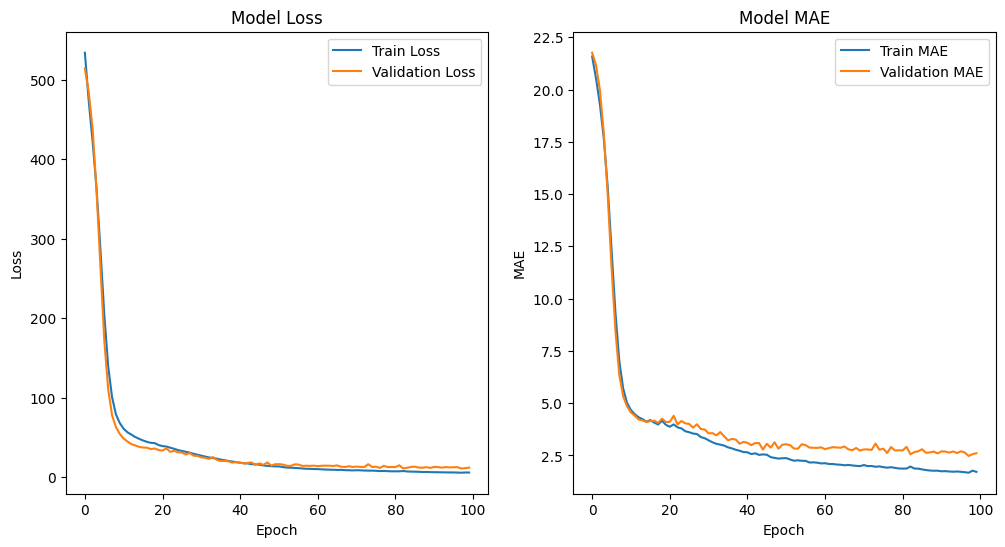

In [ ]:
# Plot Learning Curves for Model 3:

# Let's plot learning curves for Model 3, focusing on both loss and MAE for training and validation phases,
# to visualize how the tanh activation function influences learning dynamics compared to relu.

# Plotting learning curves for the last fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Model 4

In [ ]:
# For Model 4, which is identical to Model 2 in terms of architecture but uses the rmsprop optimizer instead of adam for training,
# we will follow the structure outlined for Model 2, adjusting only the optimizer.
# This change aims to explore the impact of different optimization algorithms on the model's learning and performance.

# Define Model 4:

# Model 4 will have the same architecture as Model 2:
# two dense layers with 128 and 64 neurons, respectively, both using relu activation functions.

def create_model_4(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),  # First dense layer with 128 neurons, relu activation
        Dense(64, activation='relu'),  # Second dense layer with 64 neurons, relu activation
        Dense(1)  # Output layer
    ])
    return model

In [ ]:
# Compile the Model with RMSprop Optimizer:

# When compiling Model 4, we'll specify rmsprop as the optimizer.

def compile_and_train_with_rmsprop(model, X_train, y_train, epochs=100, validation_split=0.2):
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_split=validation_split, verbose=0)
    return history

In [ ]:
# Cross-Validation for Model 4:

# Let's perform cross-validation using KFold, similar to the previous models,
# to evaluate Model 4's performance in terms of cross-validated MAE and its standard deviation.

n_splits = 3
kf = KFold(n_splits=n_splits)

cv_scores_4 = []

for train_index, val_index in kf.split(X_train_scaled):
    # Split data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train Model 4
    model = create_model_4(input_dim=X_train_scaled.shape[1])
    history = compile_and_train_with_rmsprop(model, X_train_fold, y_train_fold, epochs=100)

    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores_4.append(scores[1])  # Assuming index 1 is MAE

mean_mae_4 = np.mean(cv_scores_4)
std_mae_4 = np.std(cv_scores_4)
print(f"Model 4 Cross-Validated MAE: {mean_mae_4:.4f} ± {std_mae_4:.4f}")

Model 4 Cross-Validated MAE: 2.5394 ± 0.1807


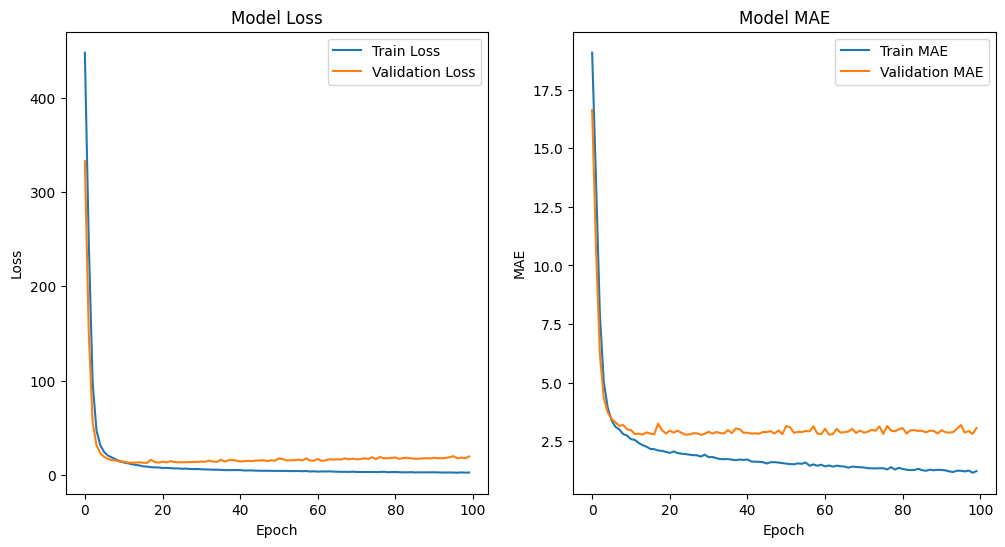

In [ ]:
# Plot Learning Curves for Model 4:

# Let's plot learning curves for Model 4, focusing on loss and MAE for both training and validation,
# to see how the rmsprop optimizer influences the model's learning process compared to adam.

# Plotting learning curves for the last fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Model Comparison

In [ ]:
# Model 2, with a configuration of two dense layers (128 and 64 neurons, respectively) and using the relu activation function,
# performed the best among all models, achieving the lowest Cross-Validated MAE of 2.4611 with a standard deviation of 0.1586.
# This indicates not only the highest accuracy on average but also consistent performance across different data subsets.

# The superior performance of Model 2 could be attributed to its increased capacity,
# allowing it to capture more complex patterns in the data without significantly increasing the risk of overfitting.
# This balance between capacity and generalization likely led to its improved performance.
# The choice of relu activation function and the structure of the network,
# coupled with the adam optimizer, seems to have provided an efficient mechanism for learning from the data.

# In contrast, Model 3's use of tanh activation functions and Model 4's adoption of the rmsprop optimizer did not yield improvements over Model 2,
# suggesting that for this particular dataset and problem, the architecture and hyperparameters of Model 2 were more effective.